## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [257]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.0 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [258]:
# Libraries to help with reading and manipulation data
import pandas as pd
import numpy as np
# Libraries to help with data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get different model scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unncessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [259]:
loan = pd.read_csv("/content/Loan_Modelling.csv")

In [260]:
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [261]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [263]:
data.shape

(5000, 14)

In [264]:
data.isnull().values.any()

np.False_

In [265]:
data.isna().values.any()

np.False_

In [266]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [267]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [268]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [269]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [270]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [271]:
data["Education"].unique()

array([1, 2, 3])

In [272]:
data["ZIPCode"].nunique()

467

### Observation:
1. All the columns data types are numerical and no categorical column in this dataset
2. No NULL/Missing/NA values
3. The mortage mean is lesser than the standard deviation, it means, there may be right skewed ( positive skewed )
4. The dataset contains 5000 records with 14 columns
5. Fixed the negative values in experience column

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

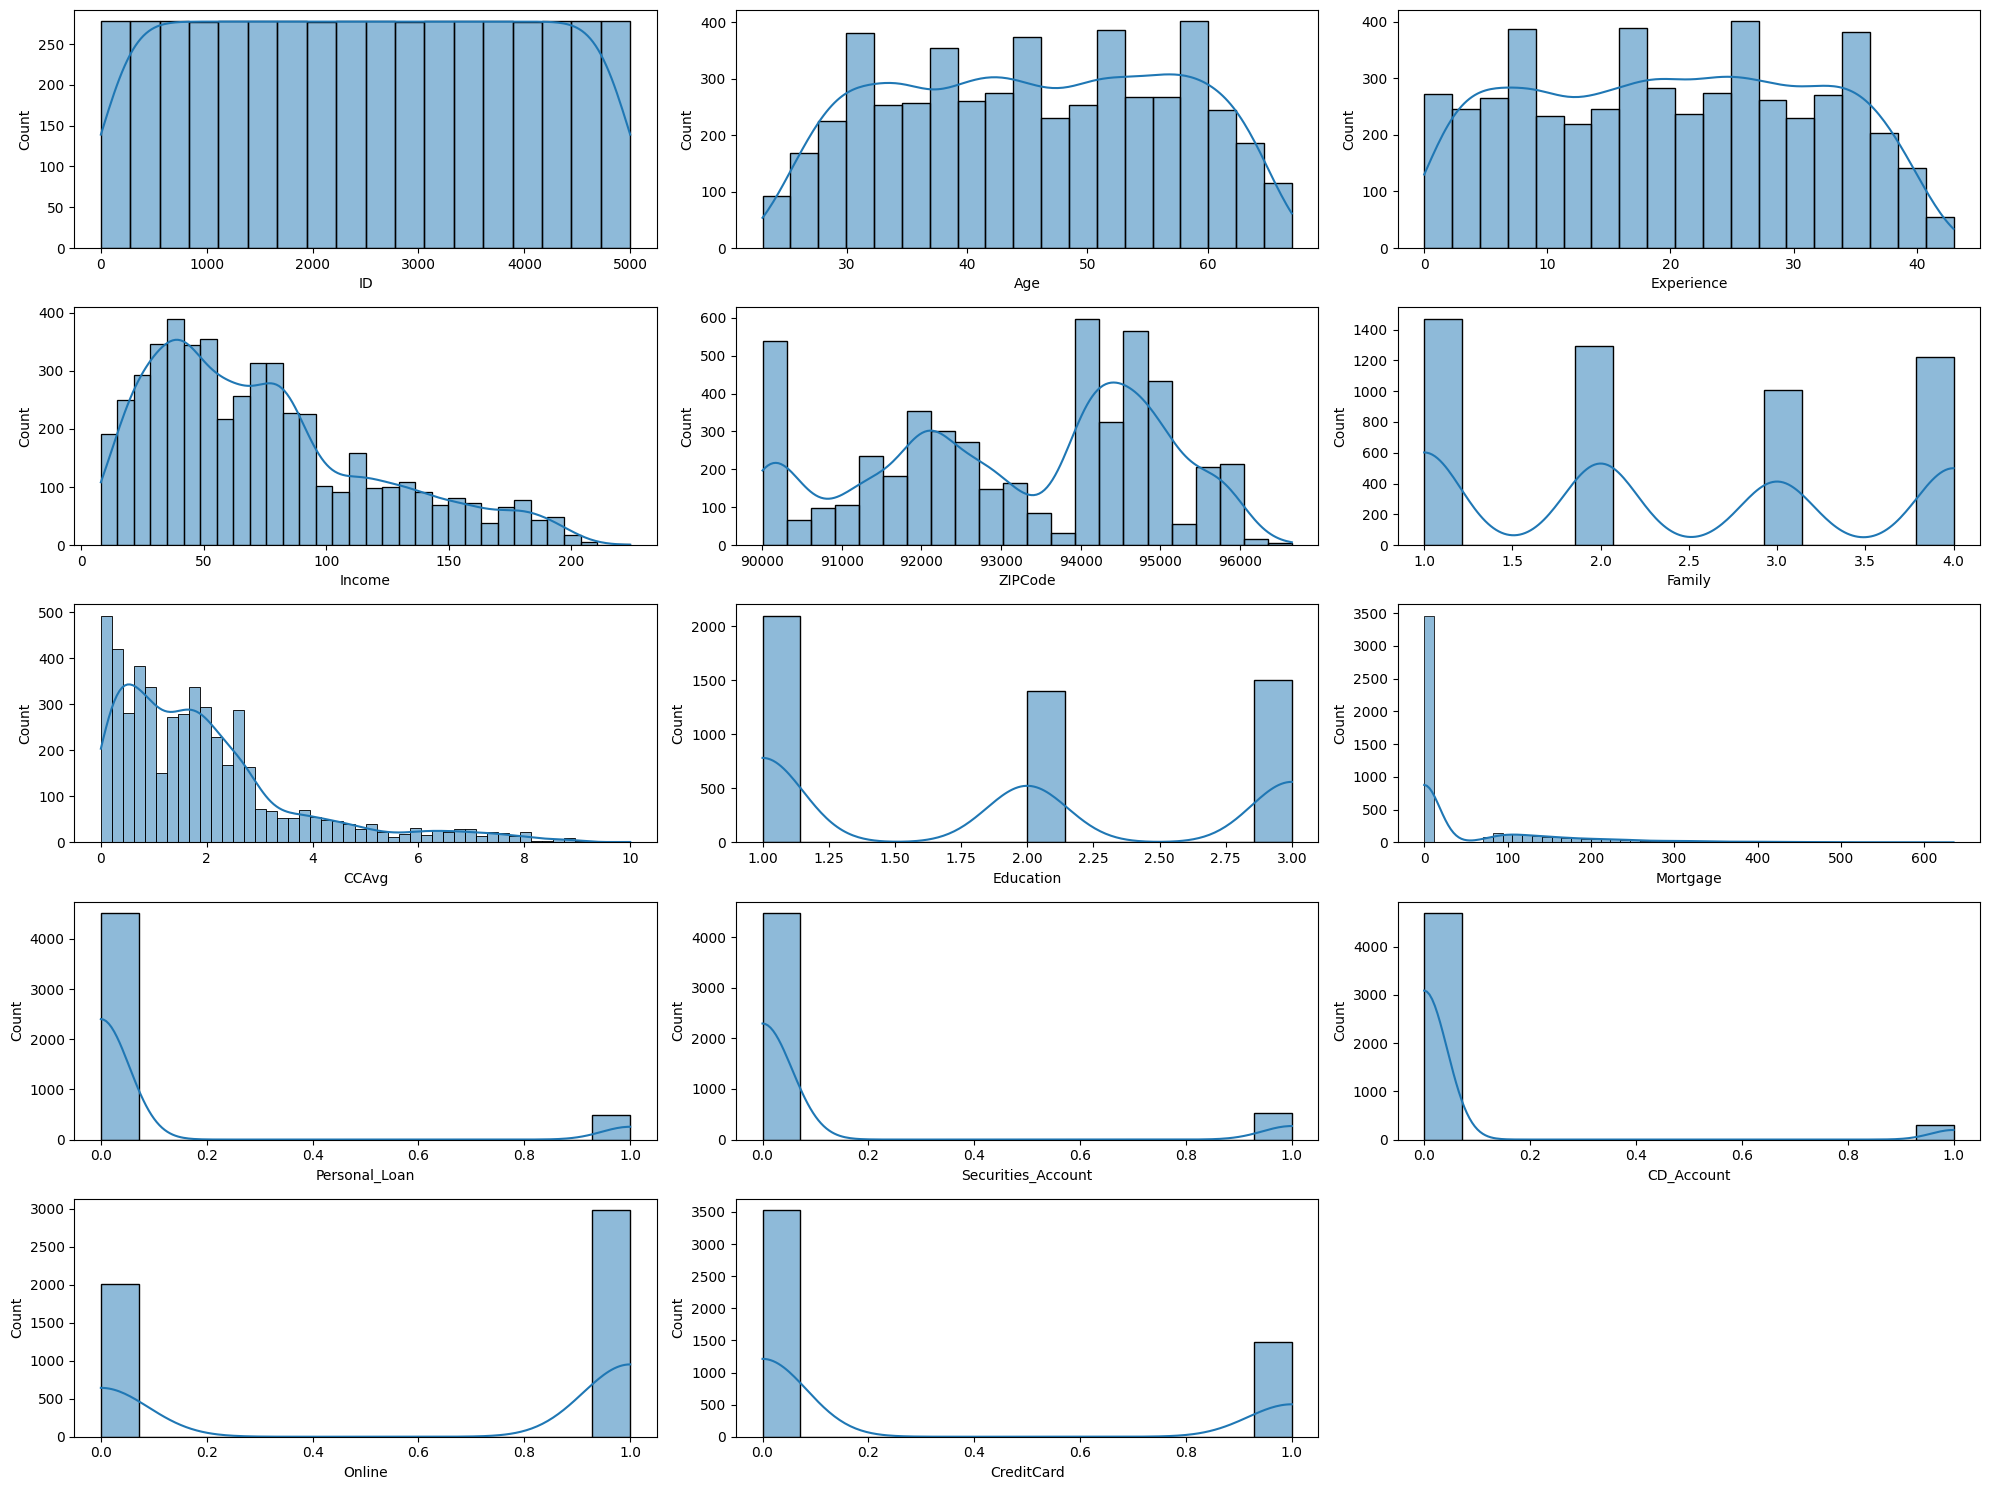

In [273]:
plt.figure(figsize=(20,15))
features = data.select_dtypes(include=['number']).columns.tolist()
num_features = len(features)
num_cols = 3  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for i, feature in enumerate(features):
  plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot layout
  sns.histplot(data=data, x=feature, kde=True)
plt.tight_layout()
plt.show();

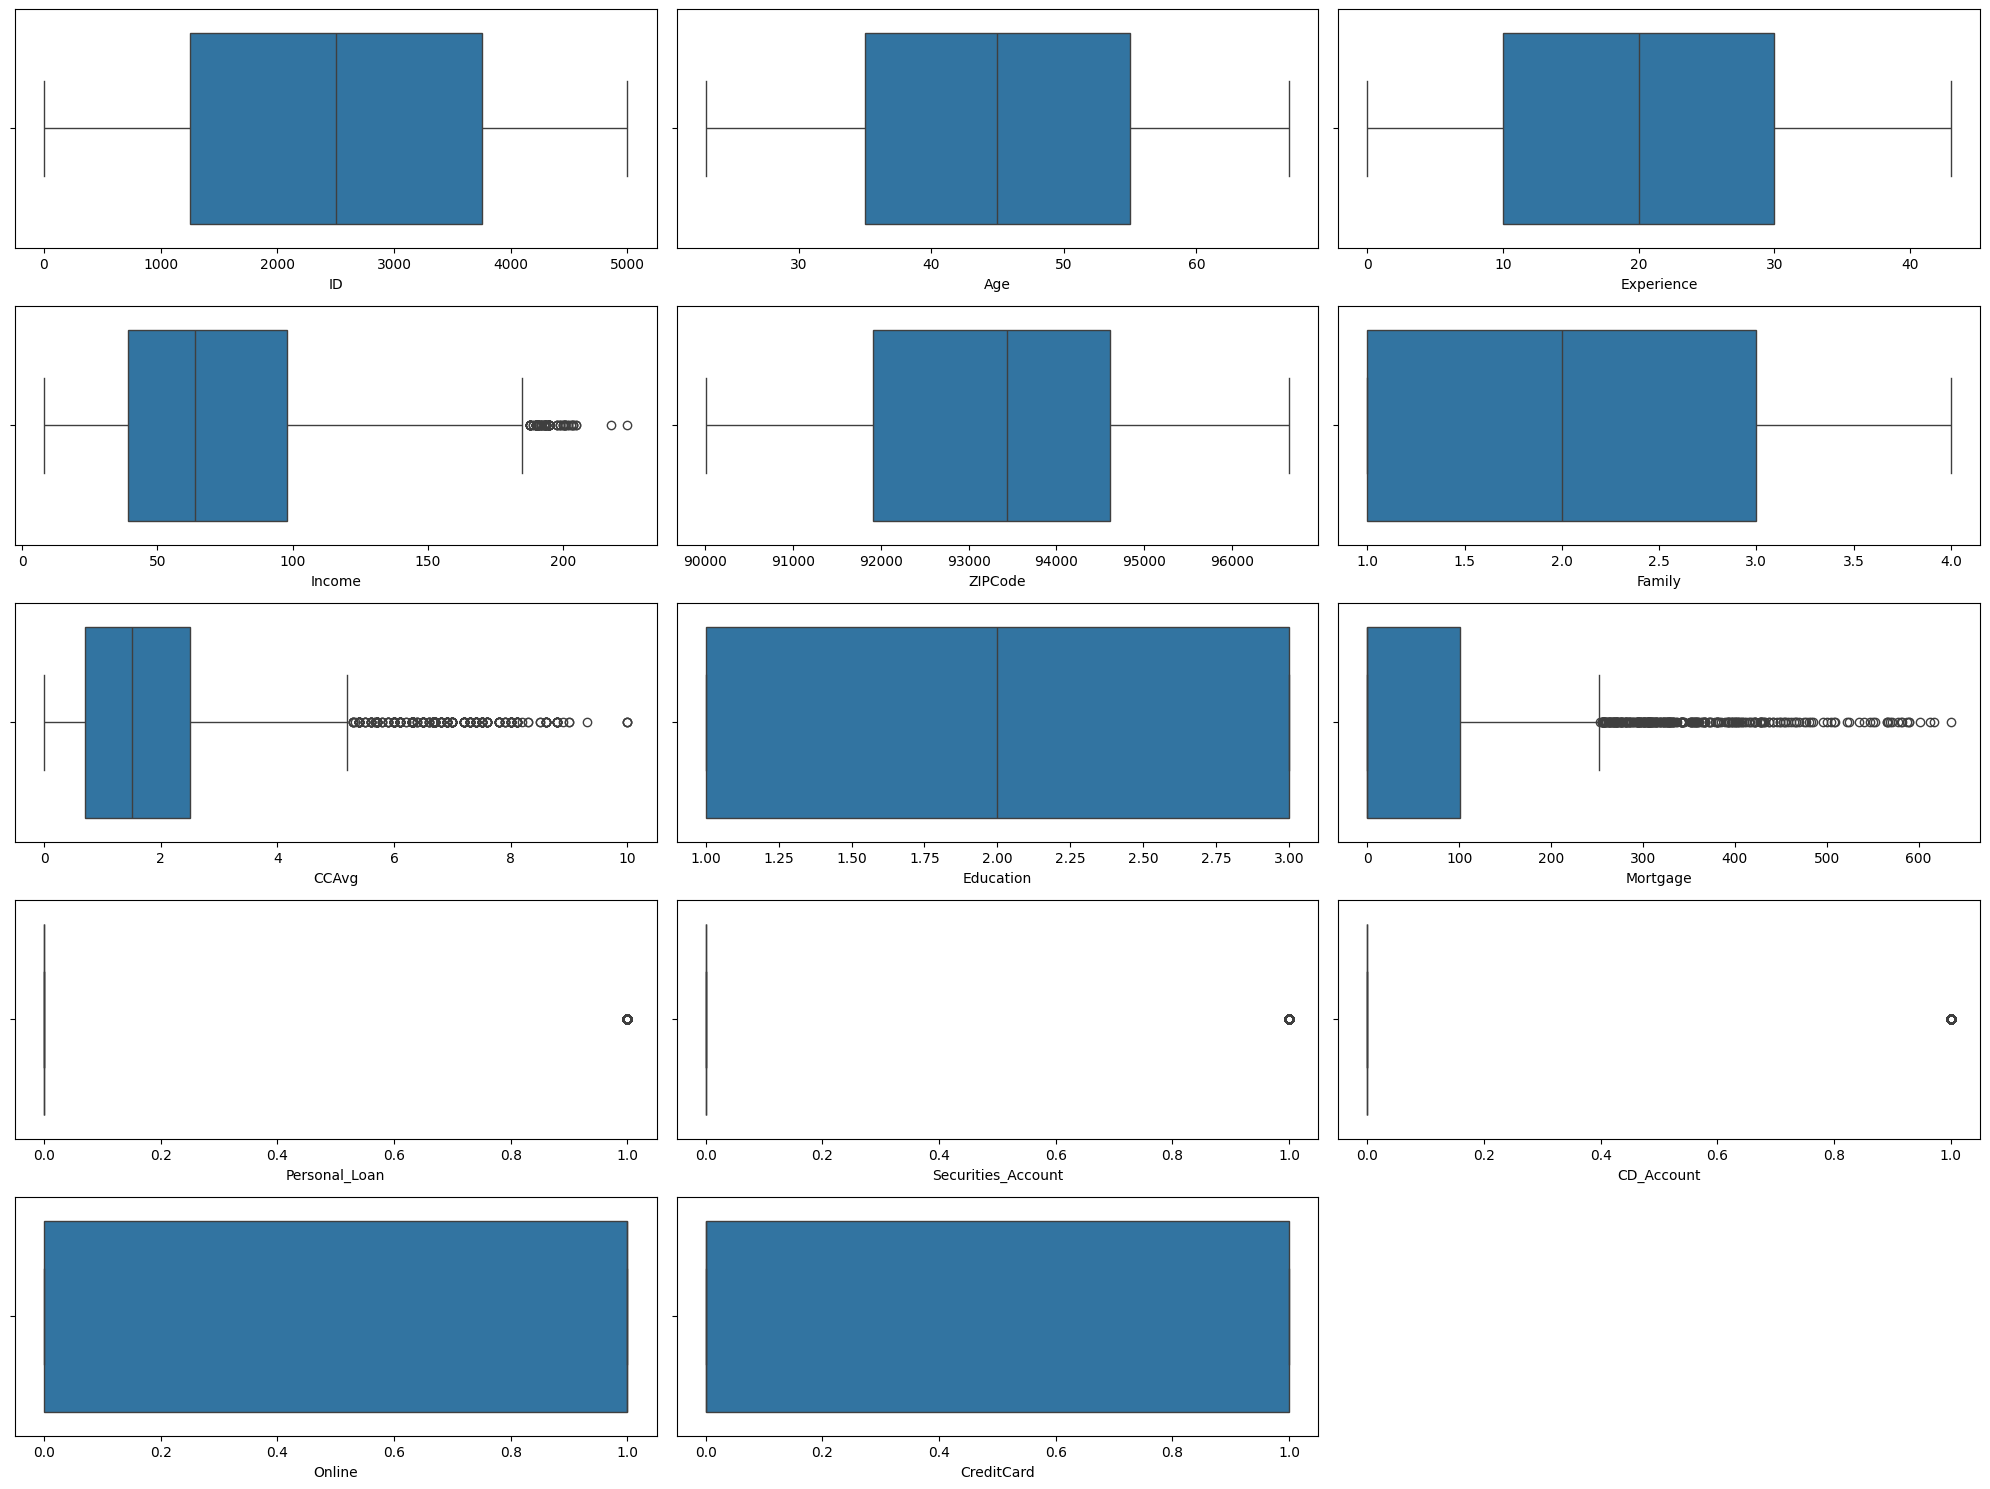

In [274]:
plt.figure(figsize=(20,15))
features = data.select_dtypes(include=['number']).columns.tolist()
num_features = len(features)
num_cols = 3  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for i, feature in enumerate(features):
  plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot layout
  sns.boxplot(data=data, x=feature)
plt.tight_layout()
plt.show();

#### Observation
1. Age: Most customers are between 35-55 years old, with a mean age of 45 years
2. Income: Right-skewed distribution with median income of $64

3. CCAvg (Credit Card Average): Most customers have monthly spending between
     $0.7K-$2.5K
4. Mortgage: Zero-inflated distribution; many customers have no mortgage
5. Education: Three levels (1: Undergrad, 2: Graduate, 3: Advanced/Professional)
6. Most customers don't have Securities Account or CD Account
7. High adoption of Online banking services
8. Good penetration of credit card services

### Bivariate Analysis

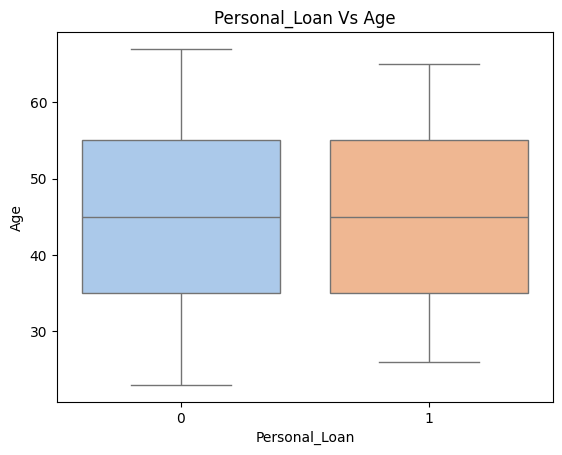

In [275]:
plt.title('Personal_Loan Vs Age')
sns.boxplot(data=data, x='Personal_Loan', y='Age',palette='pastel');

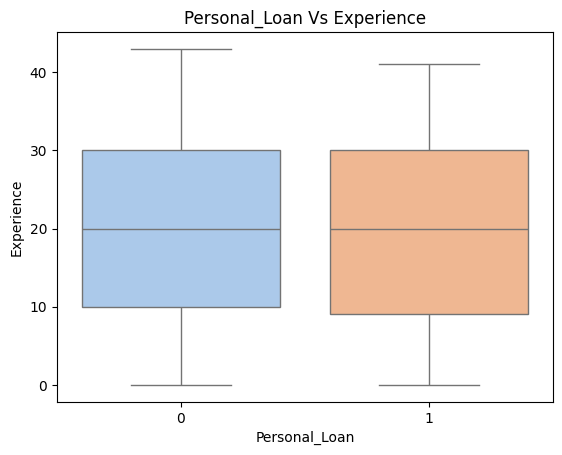

In [276]:
plt.title('Personal_Loan Vs Experience')
sns.boxplot(data=data, x='Personal_Loan', y='Experience',palette='pastel');

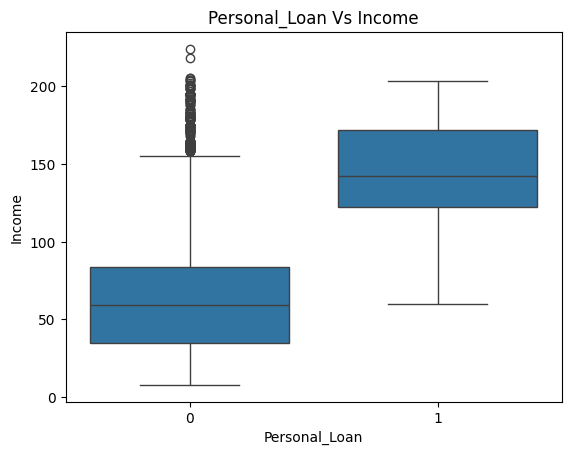

In [277]:
plt.title('Personal_Loan Vs Income')
sns.boxplot(data=data, x='Personal_Loan', y='Income');

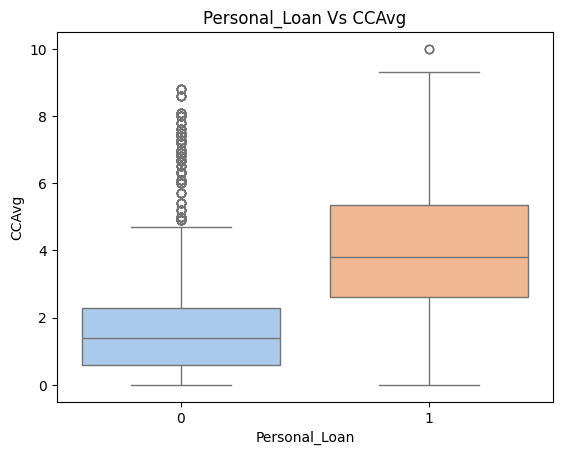

In [278]:
plt.title('Personal_Loan Vs CCAvg')
sns.boxplot(data=data, x='Personal_Loan', y='CCAvg',palette='pastel');

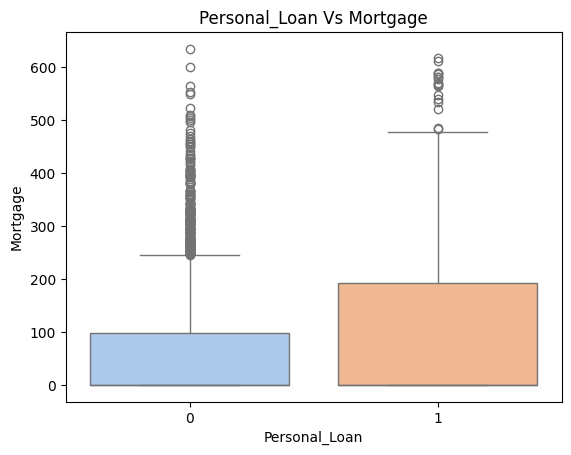

In [279]:
plt.title('Personal_Loan Vs Mortgage')
sns.boxplot(data=data, x='Personal_Loan', y='Mortgage', palette='pastel');

#### Observation
1. Income shows strong positive correlation with loan acceptance
2. Higher credit card spending (CCAvg) associated with loan acceptance
3. Age and Experience show moderate relationship with loan acceptance
4. Mortgage shows weak relationship with loan acceptance

### Multivariate Analysis

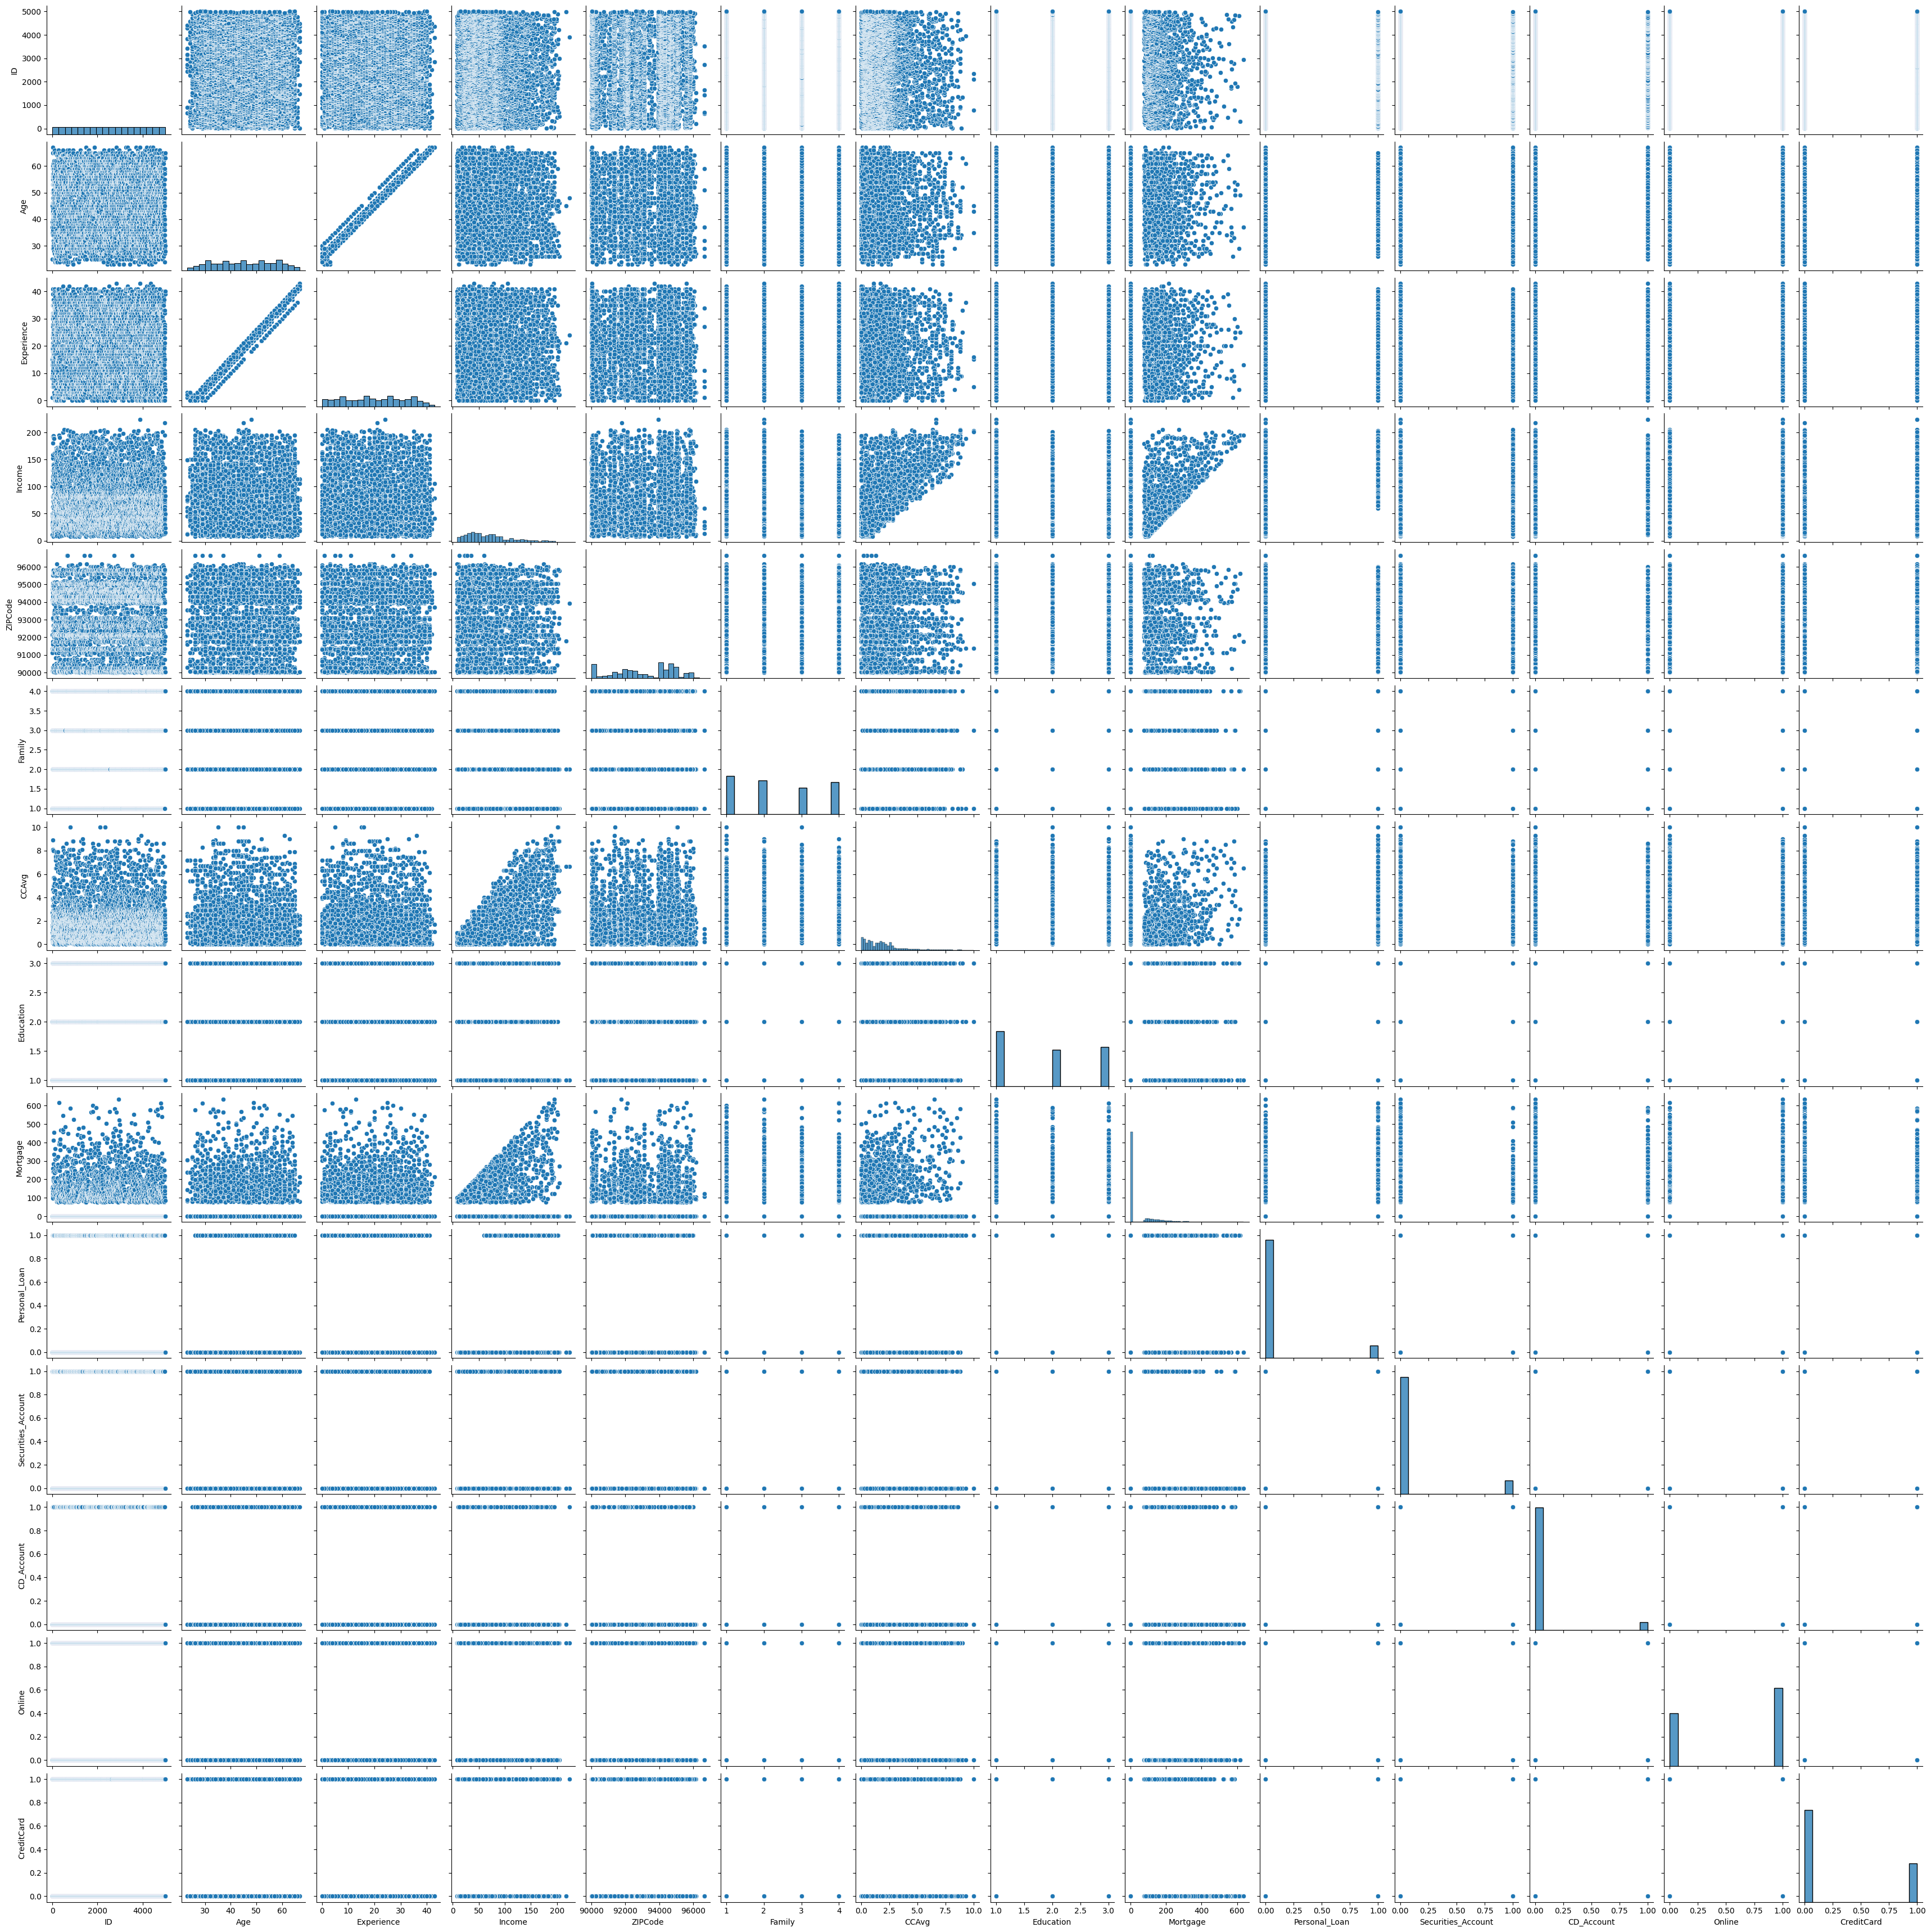

In [280]:
sns.pairplot(data);

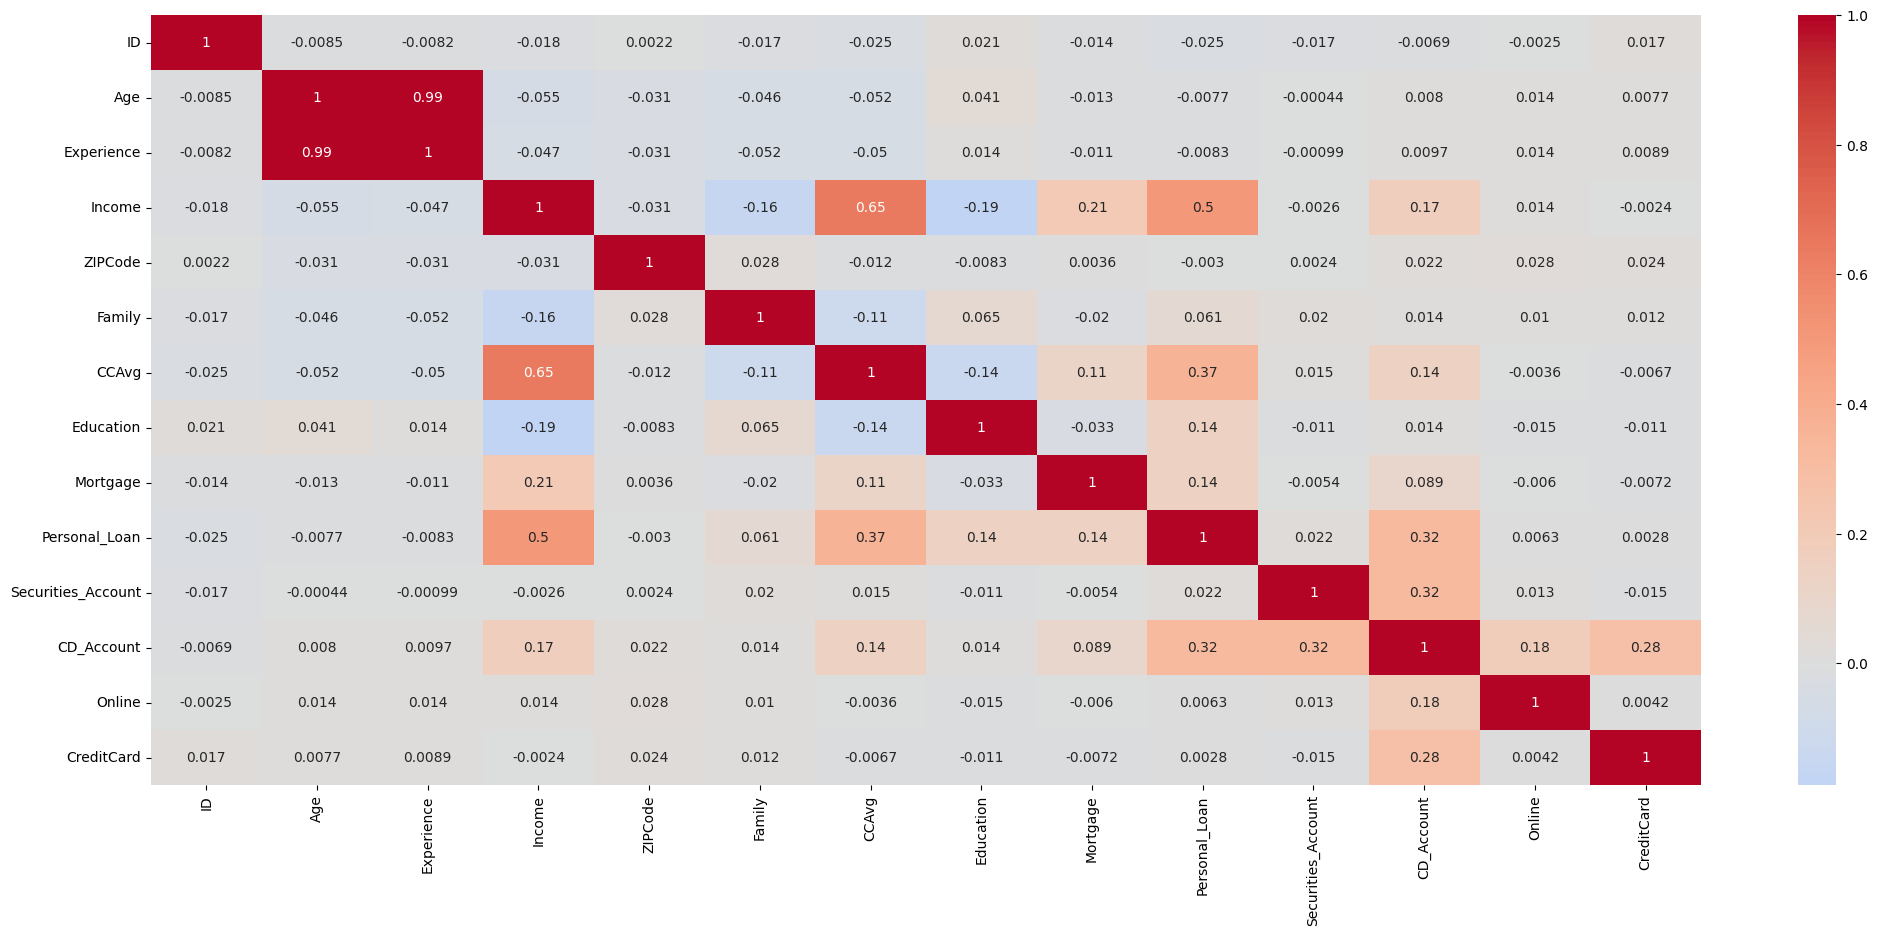

In [281]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.show()

#### Observation
1. Education: Higher education levels show increased loan acceptance rates
2. CD Account holders more likely to accept personal loans
3. Online banking and credit card ownership show moderate influence
4. Strong positive correlation between Age and Experience
5. Moderate positive correlation between Income and CCAvg
6. Personal Loan has strongest positive correlations with Income, CCAvg (Credit Card Spending) and CD Account


### Question & Answers : What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
Based on the analysis of the Mortgage attribute, there are several notable patterns:

1. Distribution Shape:
* The distribution is highly right-skewed
* There's a large concentration at 0, indicating many customers don't have a mortgage
* The non-zero values show a spread up to 635 thousand dollars
2. Key Statistics:
* Median (50th percentile) is 0, showing that at least half of the customers don't have a mortgage
* 75th percentile is at 101.0, meaning 75% of customers have mortgages below $101,000

* Maximum mortgage amount is $635,000

* Mean mortgage amount is approximately $56,499.

3. Outliers:
* There are numerous outliers visible in the box plot, particularly above $200,000
* These outliers represent customers with significantly higher mortgage amounts than the typical customer
* The long right tail in the histogram confirms the presence of these high-value mortgages

4. Zero-inflation:
* There's a significant zero-inflation in the data, meaning a large proportion of customers have no mortgage
* This creates a bimodal distribution with one mode at 0 and another around the $100,000-150,000 range

### Question : How many customers have credit cards?
Number of customers with credit cards:

1470

### Question : What are the attributes that have a strong correlation with the target attribute (personal loan)?

Based on the correlation analysis, here are the attributes that have the strongest correlations with Personal Loan (in order of strength):

1. Income (0.50): Strong positive correlation, suggesting that higher income customers are more likely to take personal loans
2. CCAvg (0.37): Moderate positive correlation, indicating that higher credit card spending is associated with personal loan acceptance
3. CD_Account (0.32): Moderate positive correlation, showing that customers with certificate of deposit accounts are more likely to have personal loans
4. Mortgage (0.14): Weak positive correlation with mortgage amounts
5. Education (0.14): Weak positive correlation, suggesting a slight tendency for higher education levels to be associated with personal loans

### Question : How does a customer's interest in purchasing a loan vary with their age?
1. The plots indicate that the age distribution between customers with and without a personal loan is very similar―with median ages around 45 years for both groups.
2. When we segment by age groups (20-30, 31-40, etc.), the loan acceptance rates are fairly similar across the different groups with percentages roughly around 8% to 11%.
3. This suggests that age, on its own, does not play a significant role in differentiating personal loan uptake in this dataset.

### Question : How does a customer's interest in purchasing a loan vary with their education?

1. Clear Education Level Impact:
* Undergrad (Level 1): ~4.4% loan acceptance rate
* Graduate (Level 2): ~13.0% loan acceptance rate
* Advanced/Professional (Level 3): ~13.7% loan acceptance rate
2. Key Findings:
* There's a substantial jump in loan acceptance rates between undergrad and higher education levels
* Advanced degree holders show slightly higher loan acceptance rates than graduates
* The difference between graduate and advanced degree holders is relatively small (~0.7%)
* Undergrad degree holders are significantly less likely to take personal loans compared to those with higher education
3. Distribution Pattern:
* The second plot shows the absolute numbers, confirming that the pattern holds true even when accounting for the different sizes of education level groups
* The proportion of loan acceptances consistently increases with education level

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [282]:
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)

In [283]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4000, 478)
Shape of test set :  (1000, 478)
Percentage of classes in training set:
Personal_Loan
0    0.90625
1    0.09375
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895
1    0.105
Name: proportion, dtype: float64


## Model Building

In [284]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

In [285]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [286]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

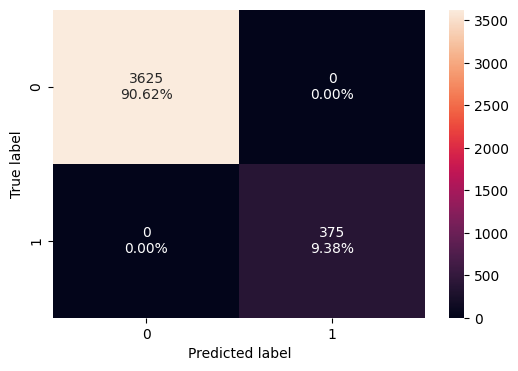

In [287]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [288]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

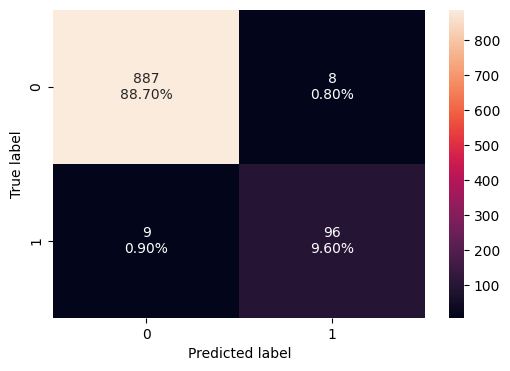

In [289]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [290]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

Accuracy    Recall  Precision       F1
0     0.983  0.914286   0.923077  0.91866

#### Obsrevation:
1. There is a huge differenc between the training and test F1 scores
2. This indicates that the model is overfitting

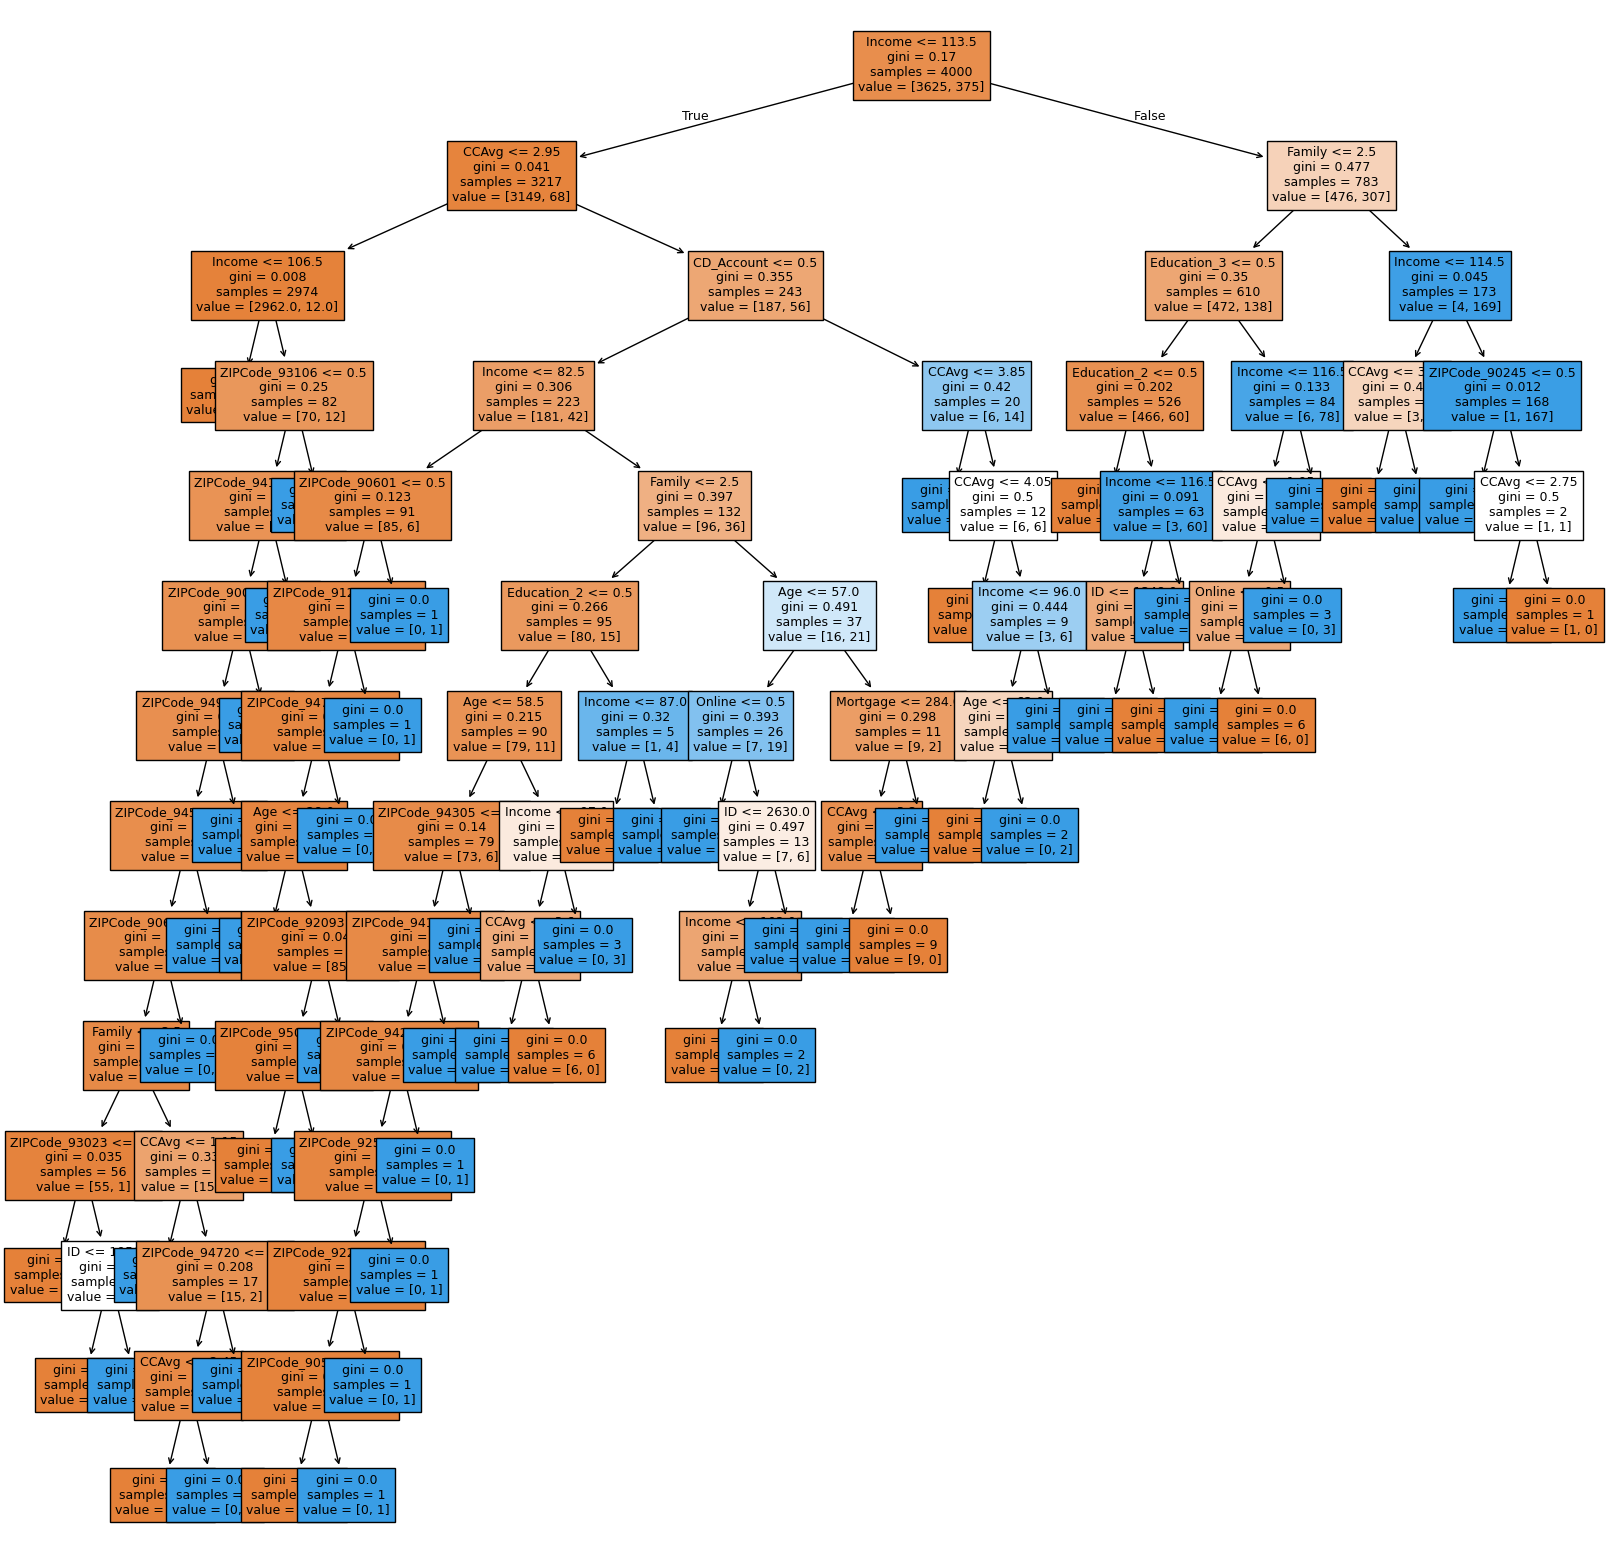

In [291]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [292]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |--- ZIPCode_94110 <= 0.50
|   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_94928 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode_94596 <= 0.50
|   |   |   |   |   |   |   |   |--- ZIPCode_90630 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_93023 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_93023 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.15
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |  

#### Observation
We can observe that this is a very complex tree.

## Model Performance Improvement


### Pre-pruning


In [293]:
# Decision Tree (Pre-pruning)
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [294]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(8), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(30), random_state=42)

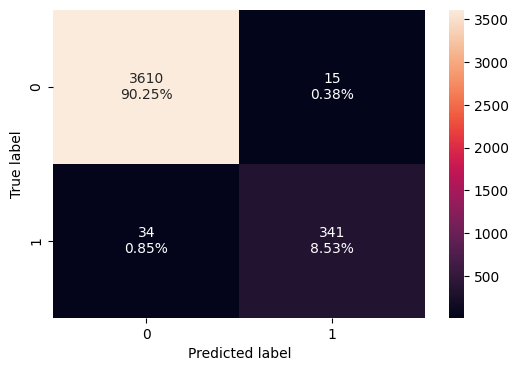

In [295]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [296]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

Accuracy    Recall  Precision        F1
0   0.98775  0.909333   0.957865  0.932969

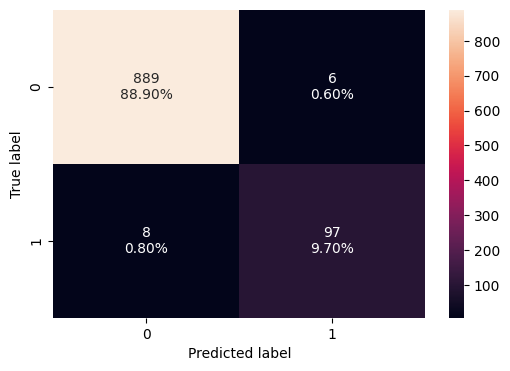

In [297]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [298]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

Accuracy   Recall  Precision        F1
0     0.986  0.92381   0.941748  0.932692

#### Observation
The training and test scores are very close to each other, indicating a generalized performance.

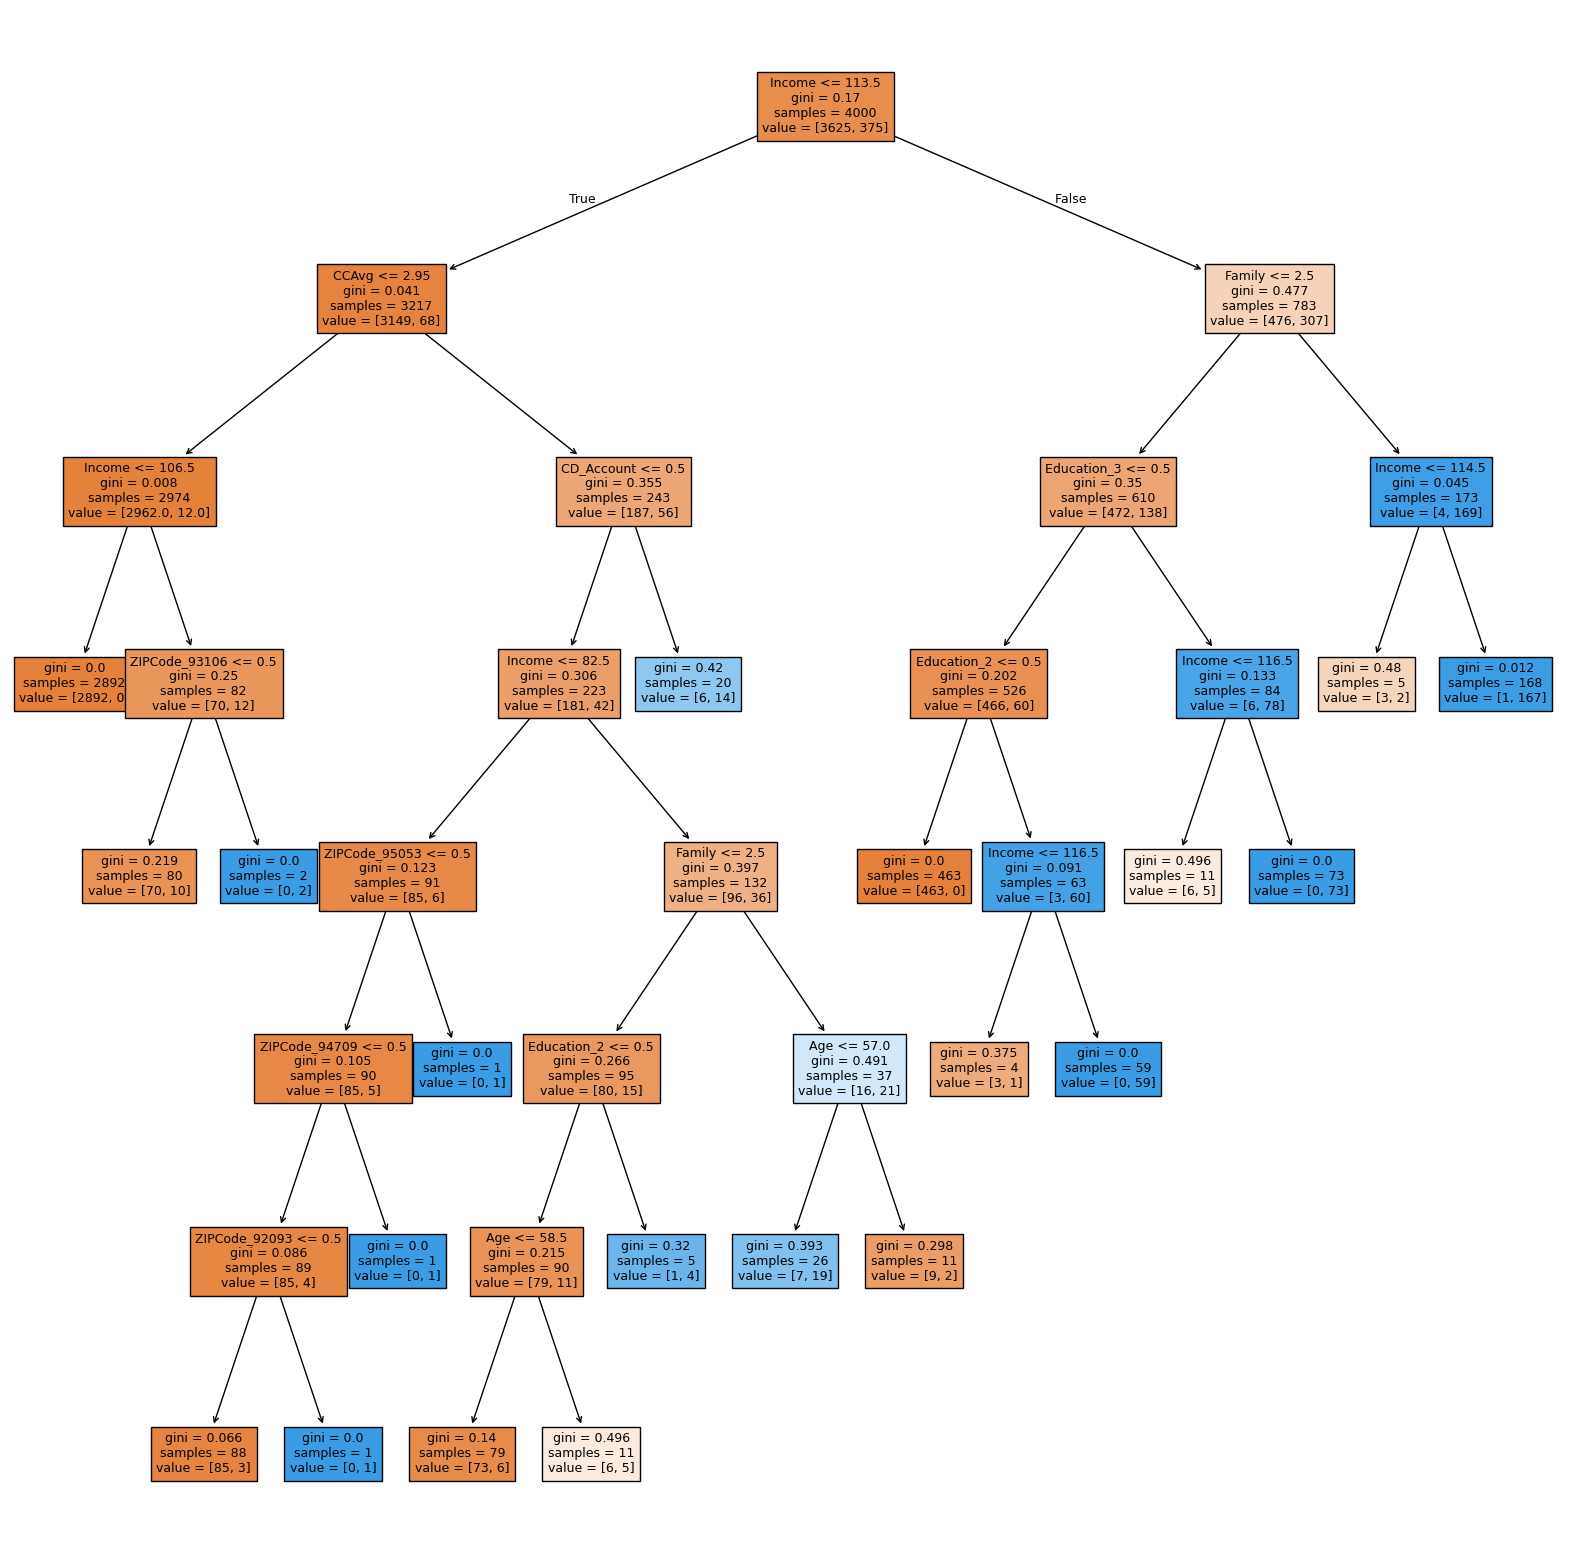

In [299]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [300]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |--- weights: [70.00, 10.00] class: 0
|   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- ZIPCode_95053 <= 0.50
|   |   |   |   |   |--- ZIPCode_94709 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_92093 <= 0.50
|   |   |   |   |   |   |   |--- weights: [85.00, 3.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_92093 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_94709 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_95053 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Income >  82.50
|   |   |   

#### Observation
This is a far less complex tree than the previous one.
We can observe the decision rules much more clearly in the plot.

### Post-pruning

In [301]:
# Decision Tree (Post-pruning)

# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [302]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000246    0.000491
2     0.000249    0.000988
3     0.000375    0.001363
4     0.000400    0.001763
5     0.000409    0.002581
6     0.000432    0.006465
7     0.000462    0.009237
8     0.000467    0.012040
9     0.000500    0.013540
10    0.000600    0.014140
11    0.000600    0.014740
12    0.000682    0.016103
13    0.000682    0.017467
14    0.000692    0.018159
15    0.000747    0.018906
16    0.000778    0.019684
17    0.000838    0.020521
18    0.000854    0.021375
19    0.000857    0.022232
20    0.000942    0.023174
21    0.001054    0.024228
22    0.001088    0.025316
23    0.001165    0.026480
24    0.001422    0.027902
25    0.001693    0.031289
26    0.002402    0.033691
27    0.005758    0.039449
28    0.024588    0.088625
29    0.037972    0.126597
30    0.043325    0.169922

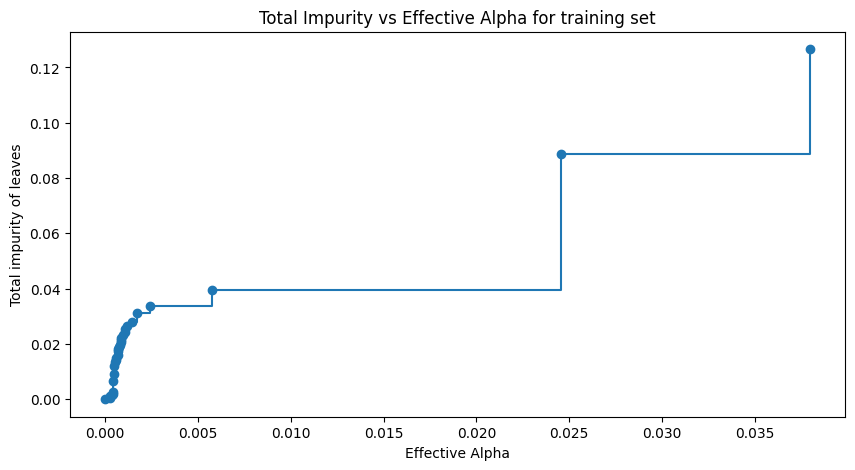

In [303]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [304]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04332510361744618


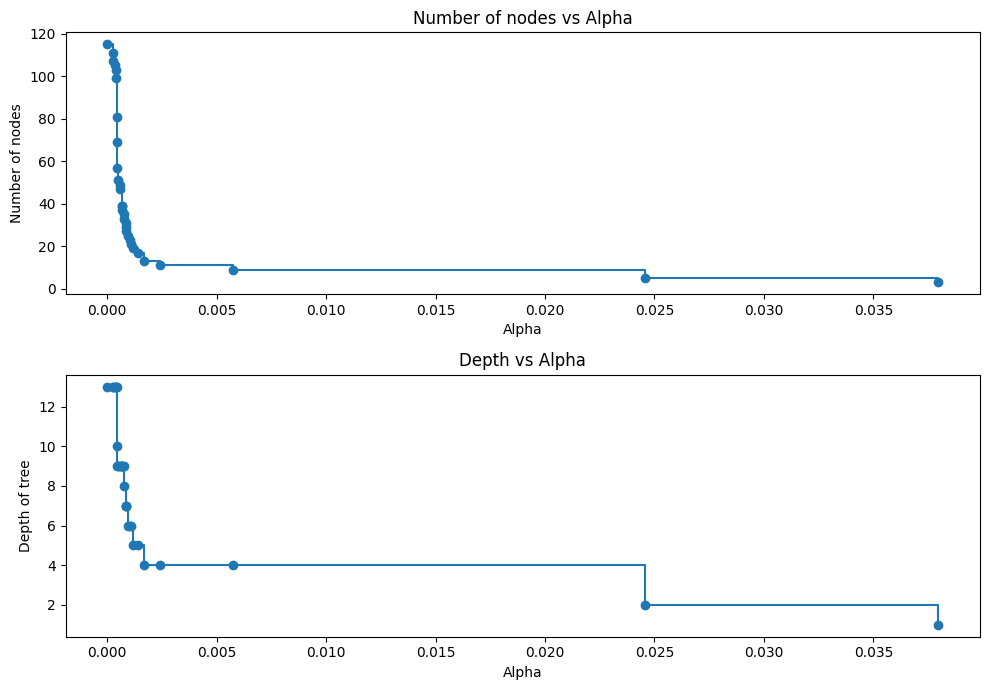

In [305]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [306]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [307]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


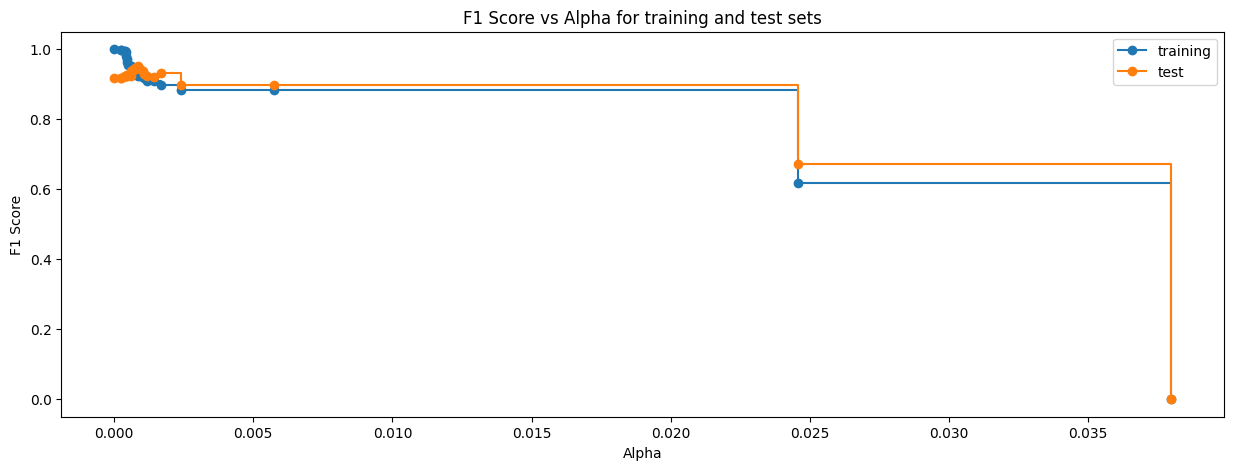

In [308]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [309]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008567334159097198),
                       random_state=42)


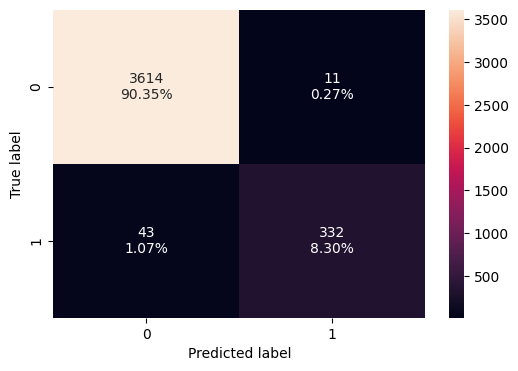

In [310]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [311]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

Accuracy    Recall  Precision        F1
0    0.9865  0.885333    0.96793  0.924791

In [312]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

Accuracy    Recall  Precision        F1
0      0.99  0.933333   0.970297  0.951456

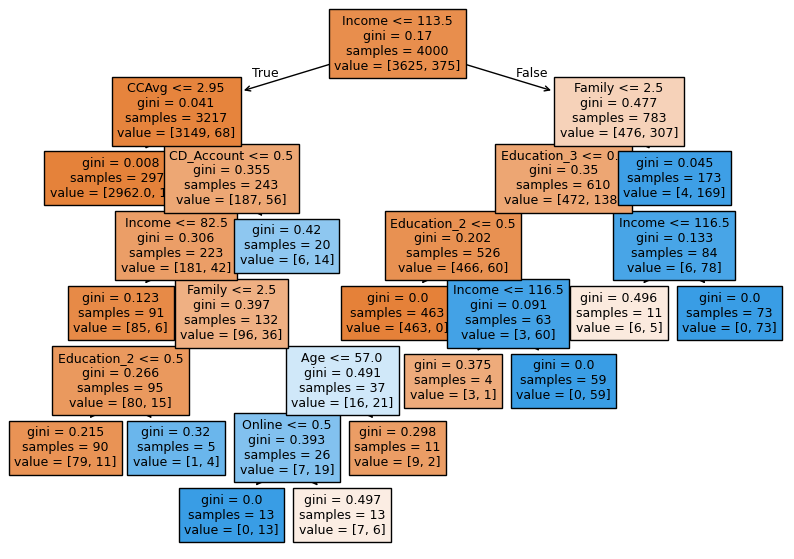

In [313]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

#### Observation
This is a far less complex tree than the previous one.

## Model Performance Comparison and Final Model Selection

In [314]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.987750   
Recall                                 1.0                     0.909333   
Precision                              1.0                     0.957865   
F1                                     1.0                     0.932969   

           Decision Tree (Post-Pruning)  
Accuracy                       0.986500  
Recall                         0.885333  
Precision                      0.967930  
F1                             0.924791

In [315]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.983000                     0.986000   
Recall                            0.914286                     0.923810   
Precision                         0.923077                     0.941748   
F1                                0.918660                     0.932692   

           Decision Tree (Post-Pruning)  
Accuracy                       0.990000  
Recall                         0.933333  
Precision                      0.970297  
F1                             0.951456

Both the pre-pruned and post-pruned decision trees demonstrate comparable generalization performance.

The post-pruned model relies on only two features for decision-making. While this leads to faster predictions, it may struggle with edge cases in unseen data. Its performance on the training and test sets is nearly identical.

In contrast, the pre-pruned decision tree incorporates a few additional features, resulting in slightly longer prediction times. However, it is more likely to perform better on unseen data due to its broader feature set.

Therefore, I have chosen the pre-pruned decision tree as our final model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Targeted Marketing:**

Focus on customer segments identified as most likely to accept personal loans (e.g., high-income individuals, those with credit card usage patterns, and higher education levels). Tailor marketing campaigns by offering personalized loan packages or attractive interest rates to these segments.

**Risk Management & Credit Assessment:**

Use the model to refine the bank’s risk profiles. Customers predicted with a high probability of accepting a loan should also be assessed thoroughly for credit risk.
Enhance underwriting models by integrating additional financial behaviors and credit history data if available.

**Optimized Product Bundling:**

Use insights from features like credit card spending and existing services (like CD accounts or mortgage history) to offer bundled financial products. For instance, offer personal loans paired with attractive credit card benefits or savings products, improving overall customer retention.

**Leveraging Pre-pruning/Post-pruning Results:**

The decision tree insights, both from pre-pruning and cost-complexity pruning, reveal key thresholds (e.g., income levels, credit card spending) that could be applied in decision systems for faster customer segmentation. This helps streamline loan approval processes and factor in additional features for risk stratification.

**Digital Transformation:**

Integrate these predictive models into the bank’s digital channels (online banking, mobile apps) to provide instant, personalized loan recommendations. This drive faster decision-making and improved customer experience.

**Continuous Monitoring and Model Refinement:**

Regularly update the models using new data trends to account for changes in customer behavior and economic conditions. This will ensure the recommendations and risk scores stay relevant and accurate.

___